In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

In [7]:
# Importing dataset and first impressions
# Variable Identification
# Univariate & Bivarite Analysis : Numerical Variables & Categorical Variables One By One
# Summary of Univariate and Bivariate Analysis 
# Checking NA val

In [8]:
# Reading Data Set - UCI 
df = pd.read_csv("data/adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary Greater than 50k Or Not'])

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary Greater than 50k Or Not
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(32561, 15)

In [11]:
# Checking Is there Any NA values 
df.isna().sum()
# No Na values 

age                               0
workclass                         0
fnlwgt                            0
education                         0
education-num                     0
marital-status                    0
occupation                        0
relationship                      0
race                              0
sex                               0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
native-country                    0
Salary Greater than 50k Or Not    0
dtype: int64

In [12]:
# Variable Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             32561 non-null  int64 
 1   workclass                       32561 non-null  object
 2   fnlwgt                          32561 non-null  int64 
 3   education                       32561 non-null  object
 4   education-num                   32561 non-null  int64 
 5   marital-status                  32561 non-null  object
 6   occupation                      32561 non-null  object
 7   relationship                    32561 non-null  object
 8   race                            32561 non-null  object
 9   sex                             32561 non-null  object
 10  capital-gain                    32561 non-null  int64 
 11  capital-loss                    32561 non-null  int64 
 12  hours-per-week                  32561 non-null

In [13]:
# Question we can find from this 

# Is age matter in salary !
# Is Education matter in salary !!
# Is occupation matter in salary !
# How Males and Females are has more Salary!
# Which Natives Country has salary greater than 50k or not !!
# Is race mattern in salary !
# How many Hours per week they were working and there salary !
# How capital Gain they have and its salary !
# How capital loss they have and there salary !!
# Which kind of people or relationship people have higher or lower salary !
# is Fnlwgt matter in salary !
# How Many work class people has salary 50 k or Not !
# Is Education Num mattern in Salary !
# How many Marital Status has greater Salary or not!

In [14]:
df['Salary Greater than 50k Or Not'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
# Start with seeing Dependent Feature 
df['Salary Greater than 50k Or Not'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary Greater than 50k Or Not, dtype: int64

In [16]:
salary = {" <=50K":1 ," >50K":0}
df['Salary Greater than 50k Or Not'] = df['Salary Greater than 50k Or Not'].map(salary)

In [17]:
# Columns check 
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary Greater than 50k Or Not'],
      dtype='object')

In [48]:
def Bivariate_cont_cat(data, cont, cat):
    plt.figure(figsize=(20,10))
    table = pd.pivot_table(data=data, values=cont, columns=cat,aggfunc=np.mean)
    print(table)
    sns.barplot(table)
    plt.show()
    sns.boxplot(x=cat, y=cont, data=data)
    plt.show()
    
    
def BVA_categorical_plot(data, tar, cat):
    data = data[[cat,tar]][:]
    table = pd.crosstab(data[tar],data[cat],)
    print(table)
    #plotting grouped plot
    plt.figure(figsize=(15,8))
    sns.countplot(x=cat,hue=tar, data=data)
    plt.show()

Salary Greater than 50k Or Not          0          1
age                             44.249841  36.783738


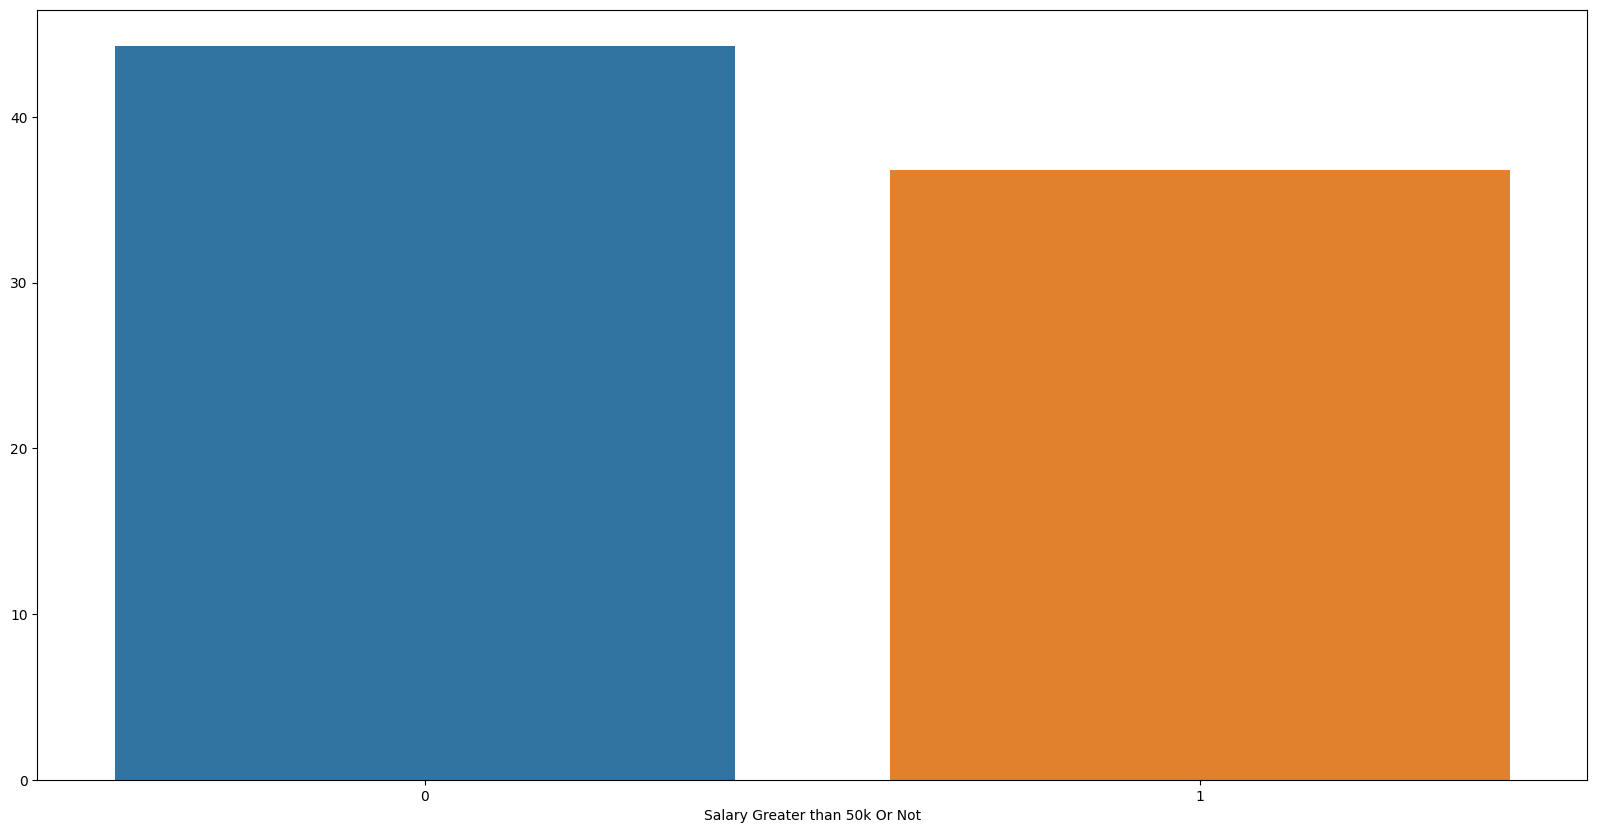

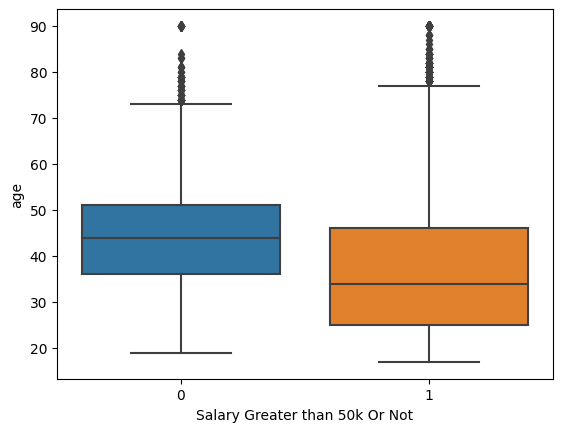

                                     age  Salary Greater than 50k Or Not
age                             1.000000                       -0.234037
Salary Greater than 50k Or Not -0.234037                        1.000000


In [36]:
# Is age matter in salary !
Bivariate_cont_cat(df,'age','Salary Greater than 50k Or Not')

print(df[['age','Salary Greater than 50k Or Not']].corr())
#Salary and age there is no correlation but with Visualization we can see >40 age has >50K salary 

Salary Greater than 50k Or Not     0     1
education                                 
 10th                             62   871
 11th                             60  1115
 12th                             33   400
 1st-4th                           6   162
 5th-6th                          16   317
 7th-8th                          40   606
 9th                              27   487
 Assoc-acdm                      265   802
 Assoc-voc                       361  1021
 Bachelors                      2221  3134
 Doctorate                       306   107
 HS-grad                        1675  8826
 Masters                         959   764
 Preschool                         0    51
 Prof-school                     423   153
 Some-college                   1387  5904


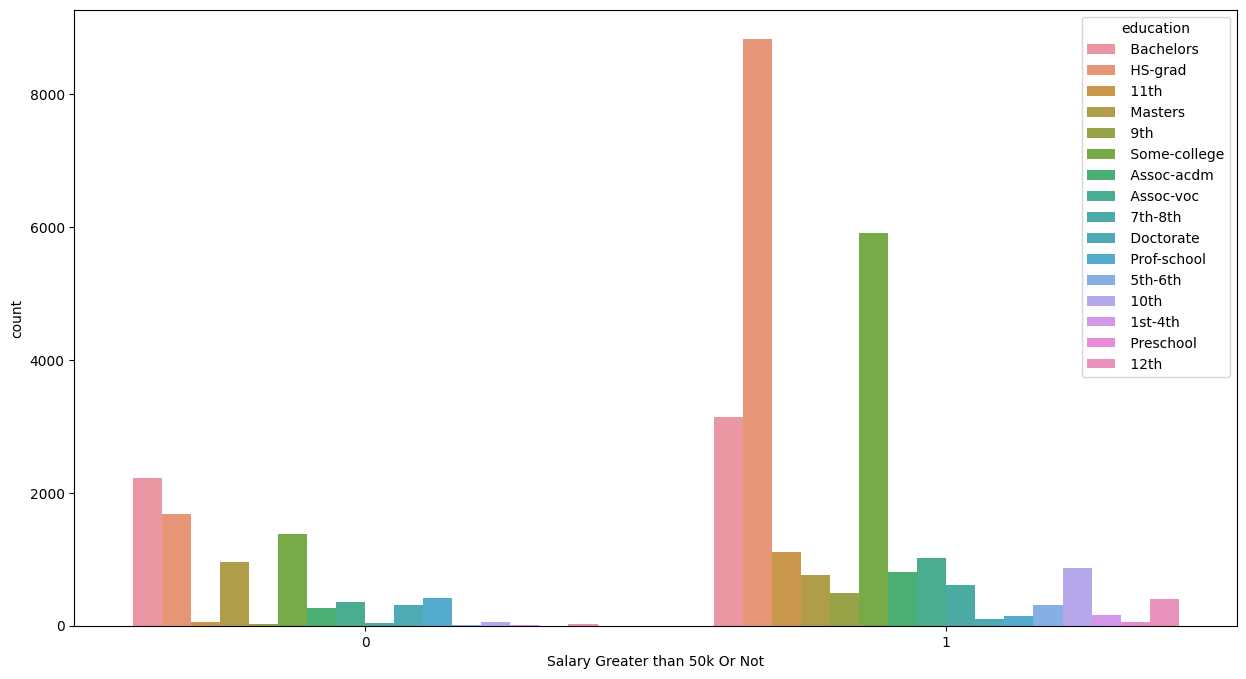

In [51]:
# Is Education matter in salary !!

BVA_categorical_plot(df,'education','Salary Greater than 50k Or Not')


# Most of Person the HS-Grad who has < 50 salary

Salary Greater than 50k Or Not     0     1
occupation                                
 ?                               191  1652
 Adm-clerical                    507  3263
 Armed-Forces                      1     8
 Craft-repair                    929  3170
 Exec-managerial                1968  2098
 Farming-fishing                 115   879
 Handlers-cleaners                86  1284
 Machine-op-inspct               250  1752
 Other-service                   137  3158
 Priv-house-serv                   1   148
 Prof-specialty                 1859  2281
 Protective-serv                 211   438
 Sales                           983  2667
 Tech-support                    283   645
 Transport-moving                320  1277


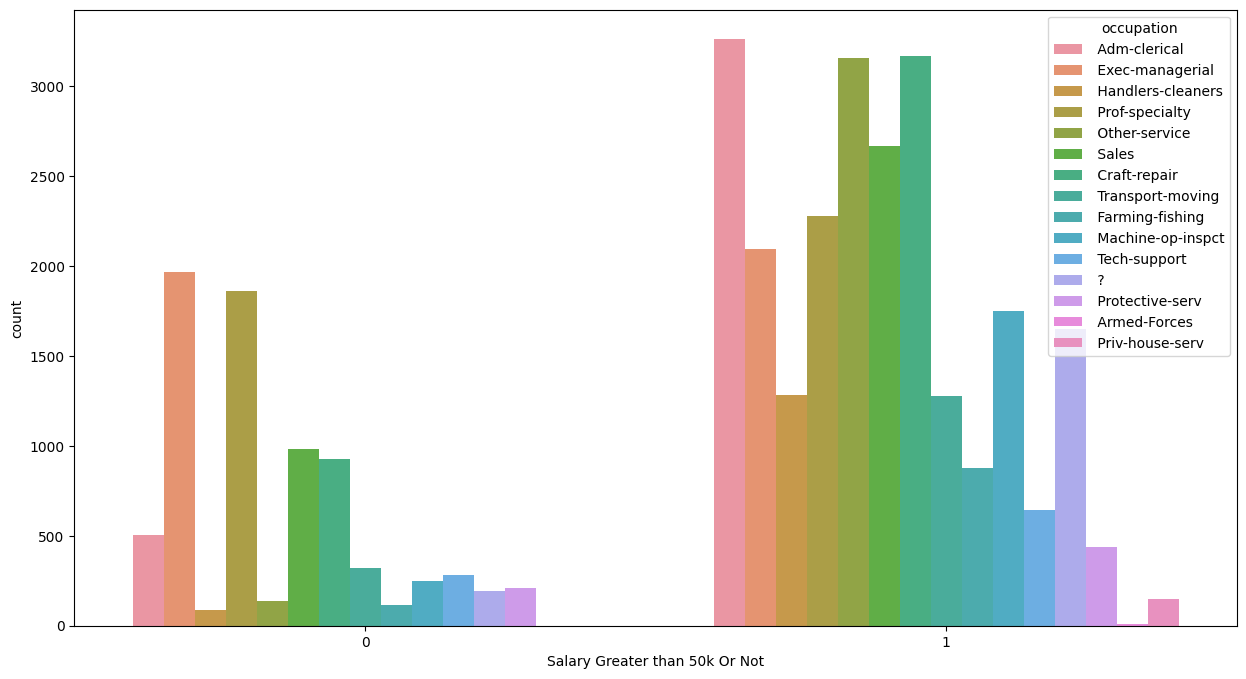

In [54]:
BVA_categorical_plot(df,'occupation','Salary Greater than 50k Or Not')


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             32561 non-null  int64 
 1   workclass                       32561 non-null  object
 2   fnlwgt                          32561 non-null  int64 
 3   education                       32561 non-null  object
 4   education-num                   32561 non-null  int64 
 5   marital-status                  32561 non-null  object
 6   occupation                      32561 non-null  object
 7   relationship                    32561 non-null  object
 8   race                            32561 non-null  object
 9   sex                             32561 non-null  object
 10  capital-gain                    32561 non-null  int64 
 11  capital-loss                    32561 non-null  int64 
 12  hours-per-week                  32561 non-null